# Exploring DATA

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

White_wine_df = pd.read_csv("../../data/raw/winequality-white.csv", sep=";")

White_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
White_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
White_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Look for duplicates:

In [17]:
if len(White_wine_df[White_wine_df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(White_wine_df[White_wine_df.duplicated()]))
    print(White_wine_df[White_wine_df.duplicated(keep=False)].sort_values(by=list(White_wine_df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  937
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4671            4.9             0.335         0.14             1.3      0.036   
4672            4.9             0.335         0.14             1.3      0.036   
3941            4.9             0.345         0.34             1.0      0.068   
3950            4.9             0.345         0.34             1.0      0.068   
2990            5.0             0.270         0.32             4.5      0.032   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4671                 69.0                 168.0  0.99212  3.47       0.46   
4672                 69.0                 168.0  0.99212  3.47       0.46   
3941                 32.0                 143.0  0.99138  3.24       0.40   
3950                 32.0                 143.0  0.99138  3.24       0.40   
2990                 58.0                 178.0  0.98956  3.45       0.31   

        alcohol  q

So since we have duplicates we should drop them

In [18]:
White_wine_df.drop_duplicates(keep= 'last')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Simplifying variable names and removing unwanted entries with method chaining

In [19]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

White_wine_df = load_and_process("../../data/raw/winequality-white.csv", ";")
White_wine_df.head()

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


# Visualizations

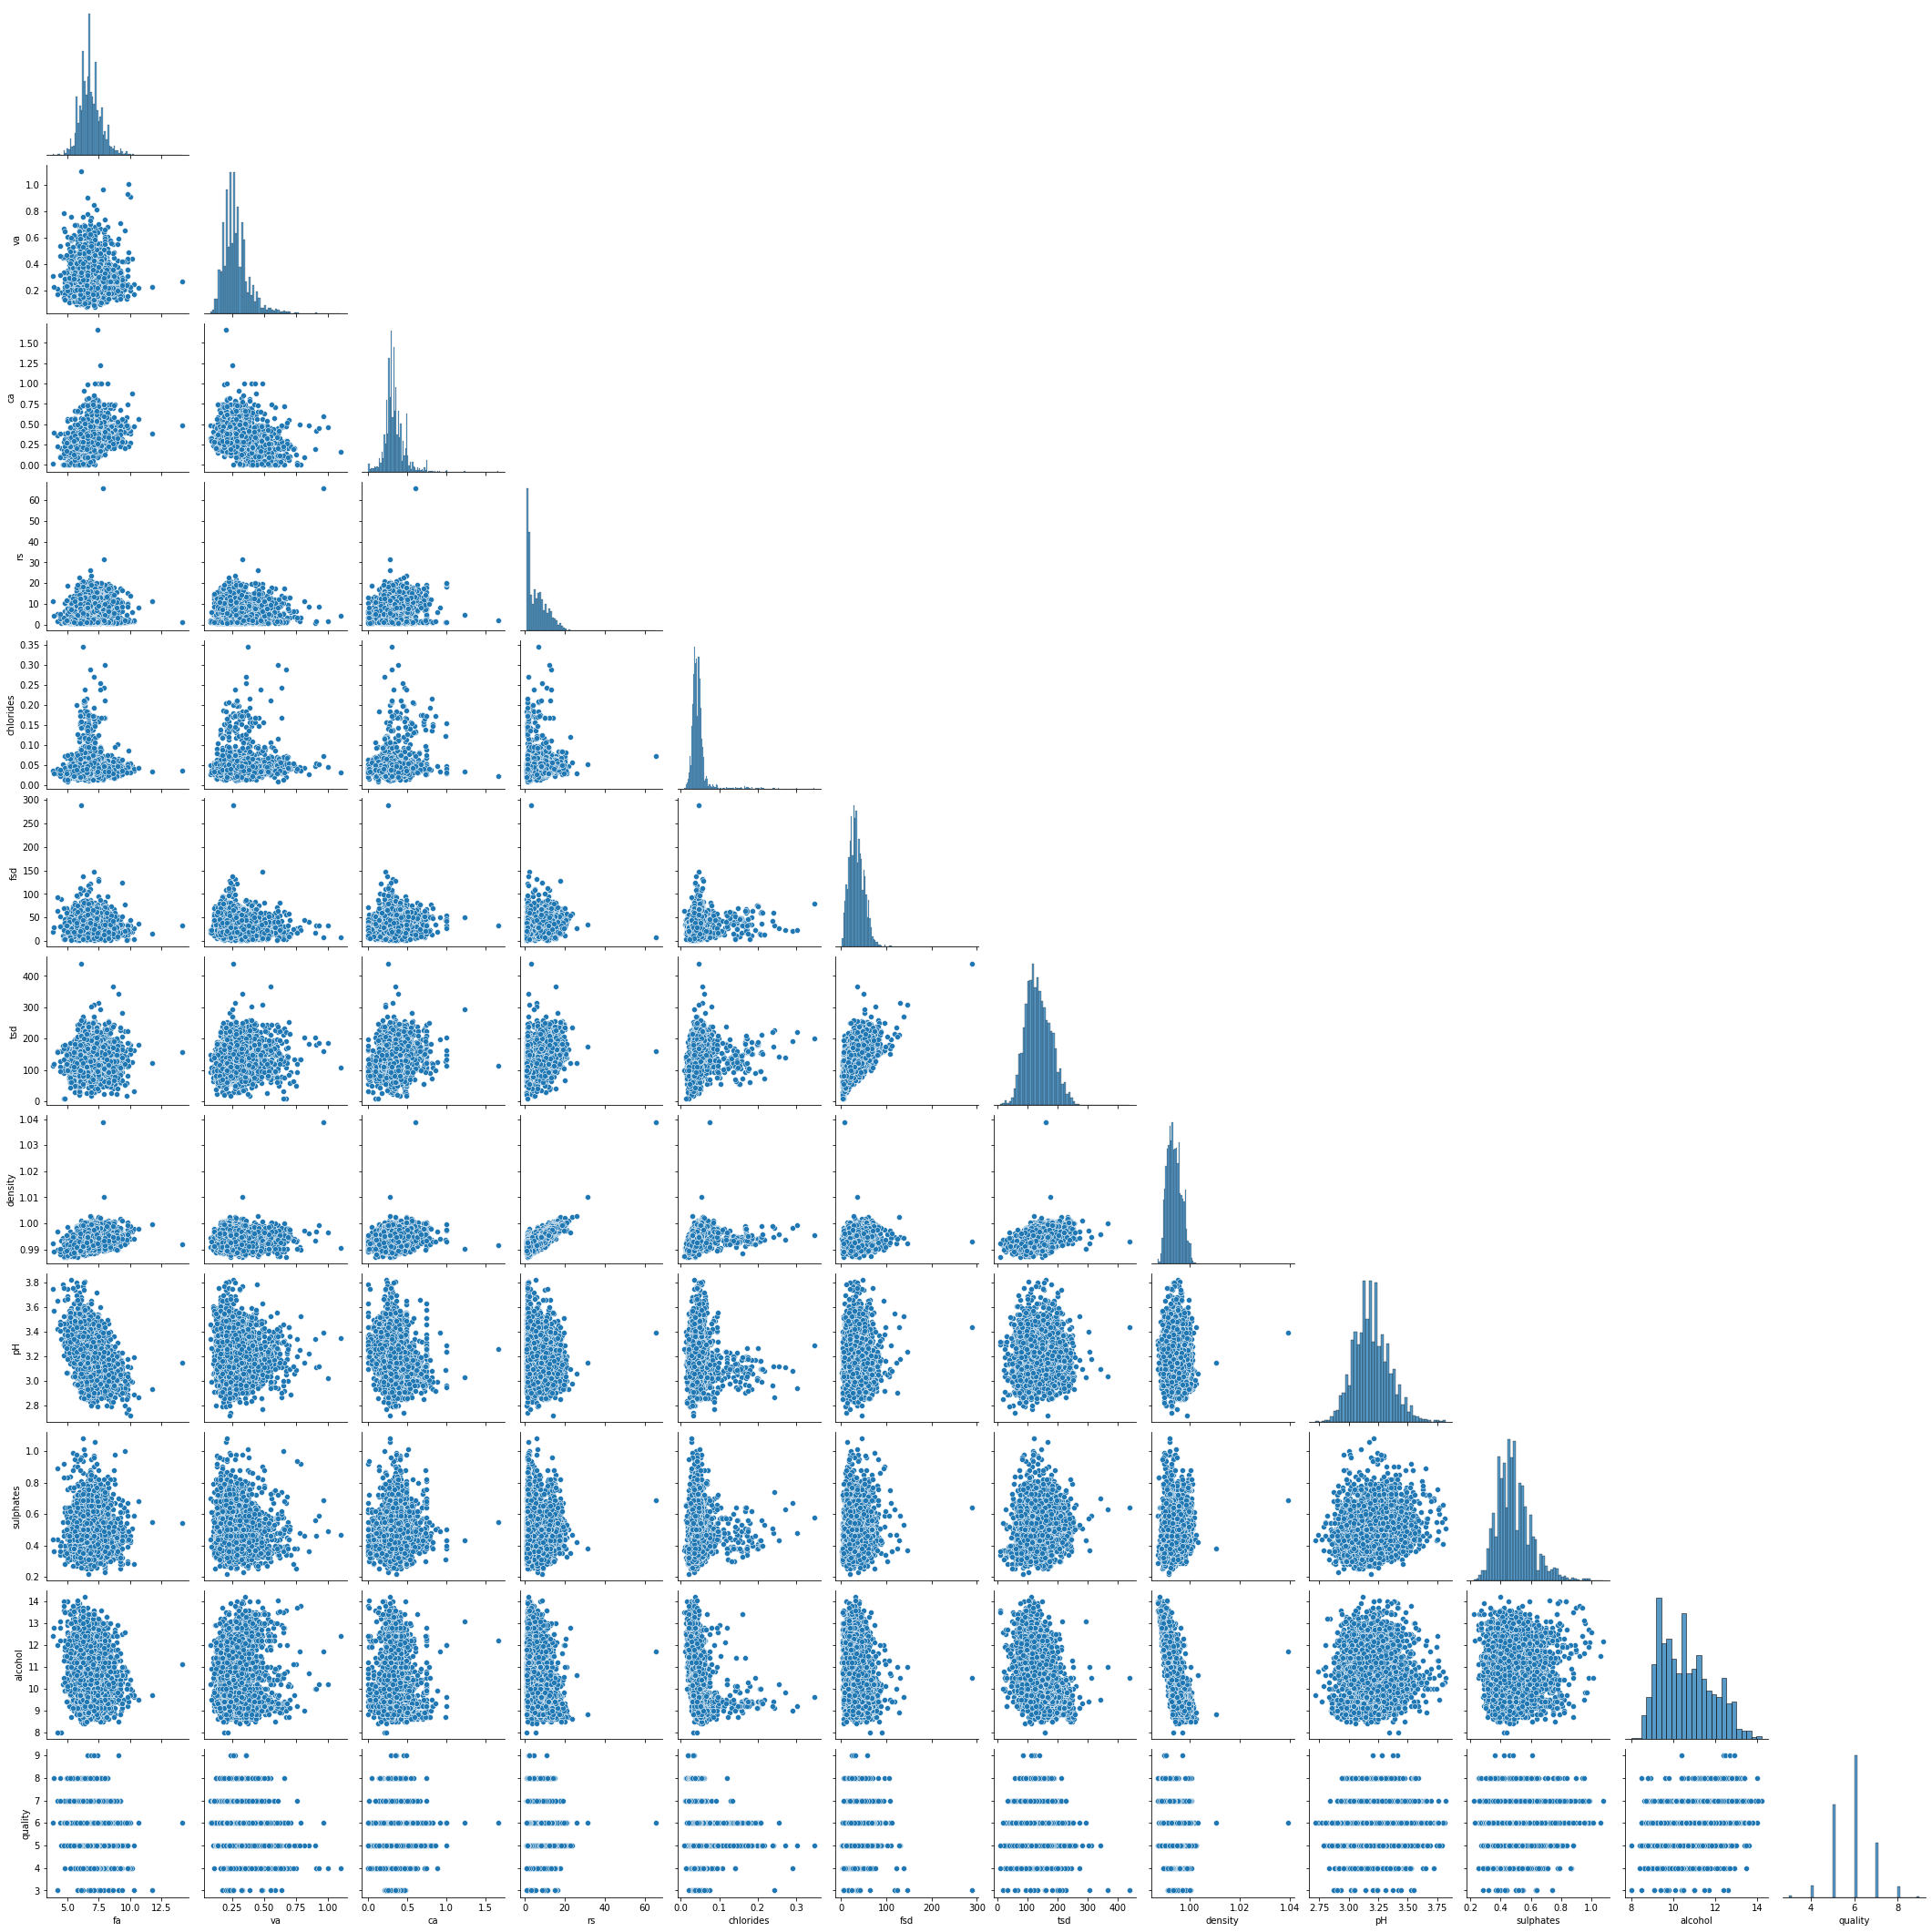

In [20]:
sns.pairplot(White_wine_df, corner=True)

These Pair Plots allow us to look at the relationships between any two variables and allows us to see the strong or weak associations 

Text(0, 0.5, 'Residual Sugar')

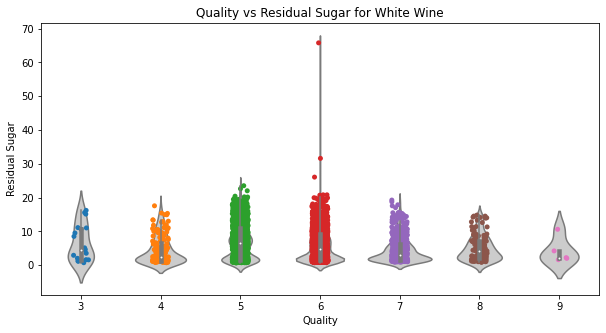

In [13]:
quality_group = White_wine_df.groupby('quality')
plt.figure(figsize=(10,5))

sns.violinplot(x="quality", y="rs", data=White_wine_df, color="0.8")
sns.stripplot(x='quality', y='rs', data=White_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Residual Sugar for White Wine")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar")

So this plot definetly looks like there is an outlier however there doesn't seem to be much correlation between residual sugar and quality

**lets keep looking more though!**

Text(0, 0.5, 'Alcohol %')

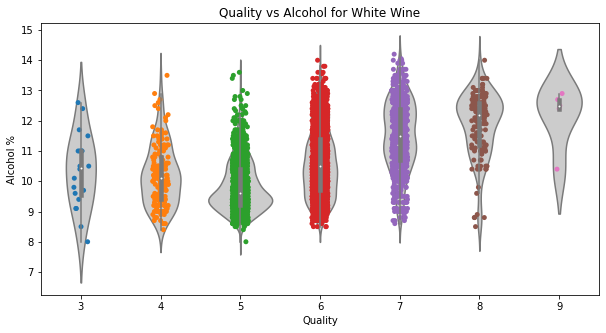

In [25]:
quality_group = White_wine_df.groupby('quality')
plt.figure(figsize=(10,5))

sns.violinplot(x="quality", y="alcohol", data=White_wine_df, color="0.8")
sns.stripplot(x='quality', y='alcohol', data=White_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Alcohol for White Wine")
plt.xlabel("Quality")
plt.ylabel("Alcohol %")

Seems that there is a bit of a *trend* here! maybe theres a sweet spot for the amount of alcohol in the wine that make the quality a bit higher? Could residual sugar be a player in this correlation?

<Figure size 576x576 with 0 Axes>

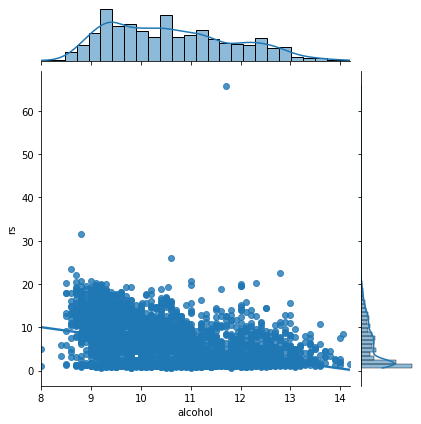

In [27]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="rs", data=White_wine_df, kind='reg')

I specifically am interested in the correlation between residual sugar and quality of the white wine,
and there seems to have some sort of negative correlation so far between residual sugar and alcohol (which has a positive corelation to quality by the looks of it. Lets look at maybe what other factors could be causing this too!

<AxesSubplot:>

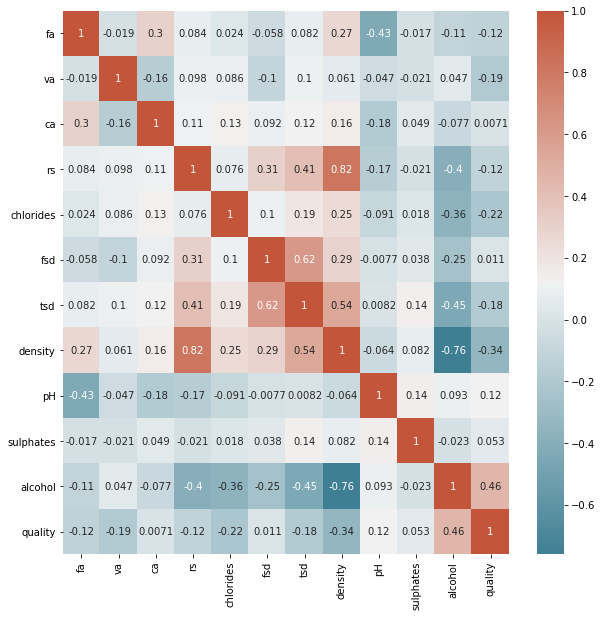

In [23]:
corr = White_wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

Here we can see a numerical representation of each variable's correlation to other variables. For example, it seems that residual sugar and density of the white wine is highly positively correlated (which would make sense as their is more minerals disolved into the wine) and residual sugar has a negative correlation with quality , the question that I have is how does the residual sugar ultimately effect the quality of the wine. We have to keep in mind that correlation does not equal causation, however from simply observing this plot alone, one can see that residual sugar is not necessarily a determining factor in the quality of wines. 